In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [5]:
prefix = './coffea/skimmed/'

suffix = 'BDT_ABCD_goodvtx_v11_NJetG0L3_OSSF'

In [6]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [7]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [10]:
sig_histo2 = util.load(f'{prefix}/signal_BDT_ABCD_goodvtx_v10_NJetG0L3_OSSF.coffea')[0]

## Signal

In [18]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [6]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'OSSF']

In [7]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [8]:
table = eff_cutflow
table.columns = cutnames

In [9]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [10]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [11]:
table = cts_cutflow
table.columns = cutnames

In [12]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,27.5180,27.4900,26.5657,26.5657,26.2251,25.5668
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",666.7773,666.1743,642.8489,642.8489,635.0341,617.6829
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",827.0445,825.9792,797.3672,797.3672,787.3198,767.1020
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,45.9089,45.8901,44.1806,44.1744,43.5820,42.4655
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,102.7526","1,102.0333","1,064.7355","1,064.7355","1,050.8564","1,018.2555"
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","1,478.2941","1,477.9960","1,424.9048","1,424.9048","1,406.4192","1,361.3700"
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",714.5297,714.5297,687.9354,687.9354,680.3314,656.2454
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","11,685.7826","11,685.7826","11,173.1411","11,173.1411","10,978.4487","10,359.8293"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,107.2824,107.2824,103.1451,103.1451,102.3719,99.0149
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","2,237.3733","2,234.0401","2,160.7601","2,160.7601","2,126.5131","2,065.1446"


In [13]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [14]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [15]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [16]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


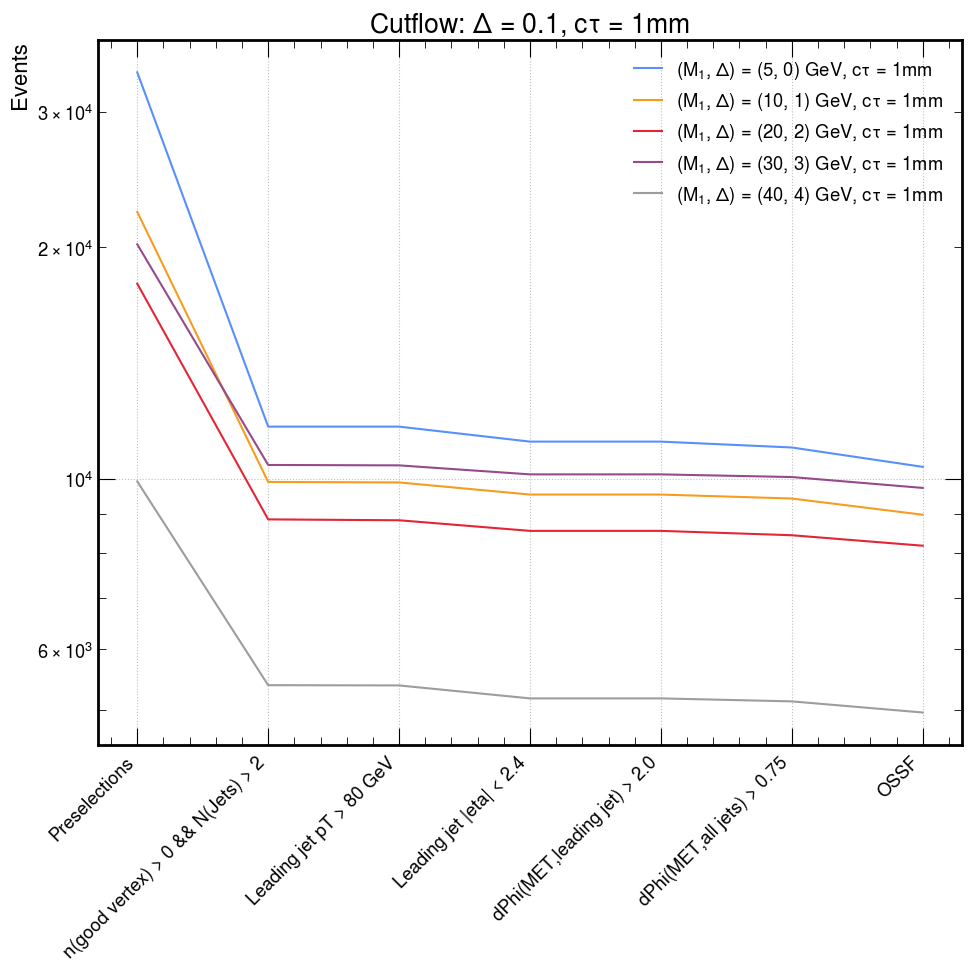

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


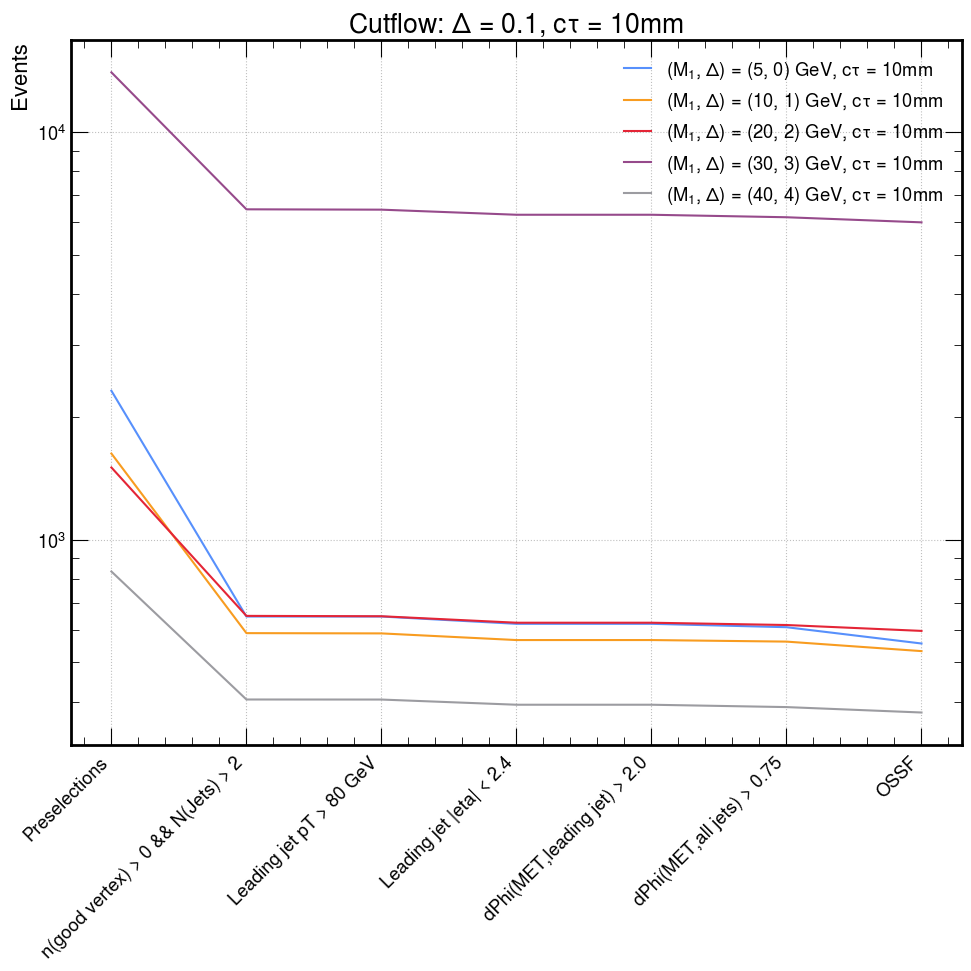

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


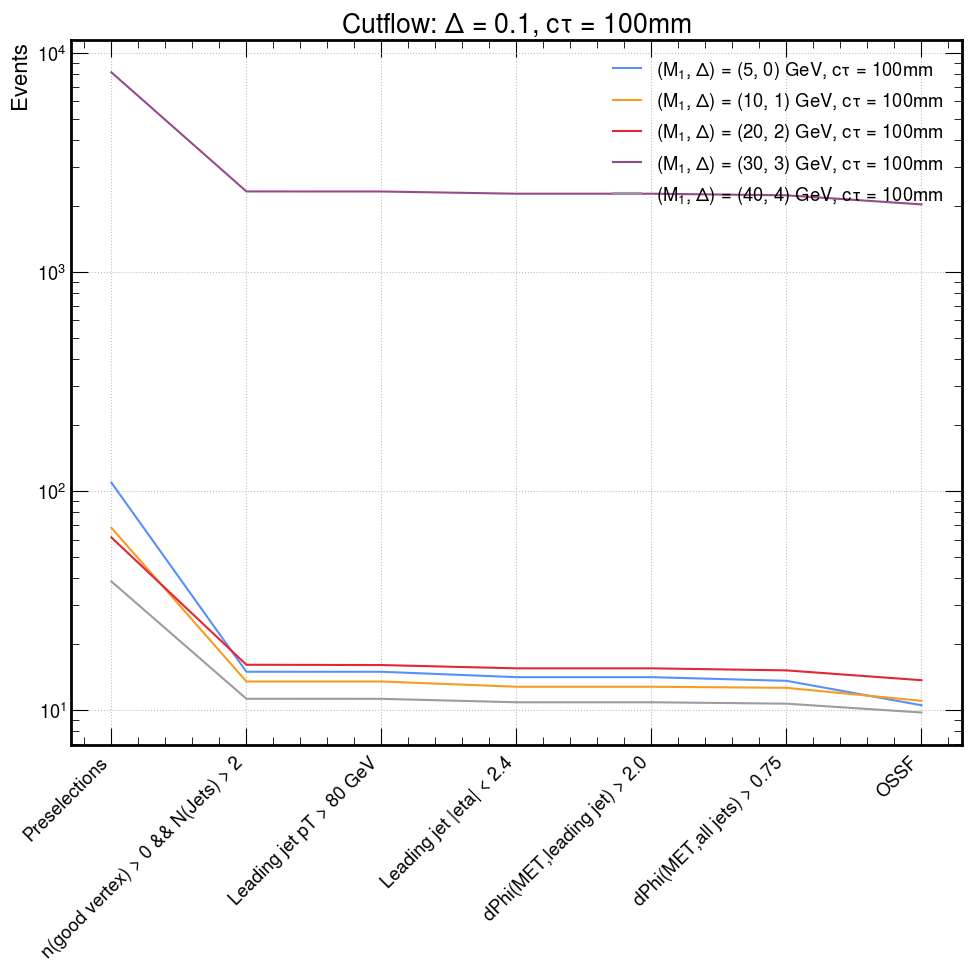

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


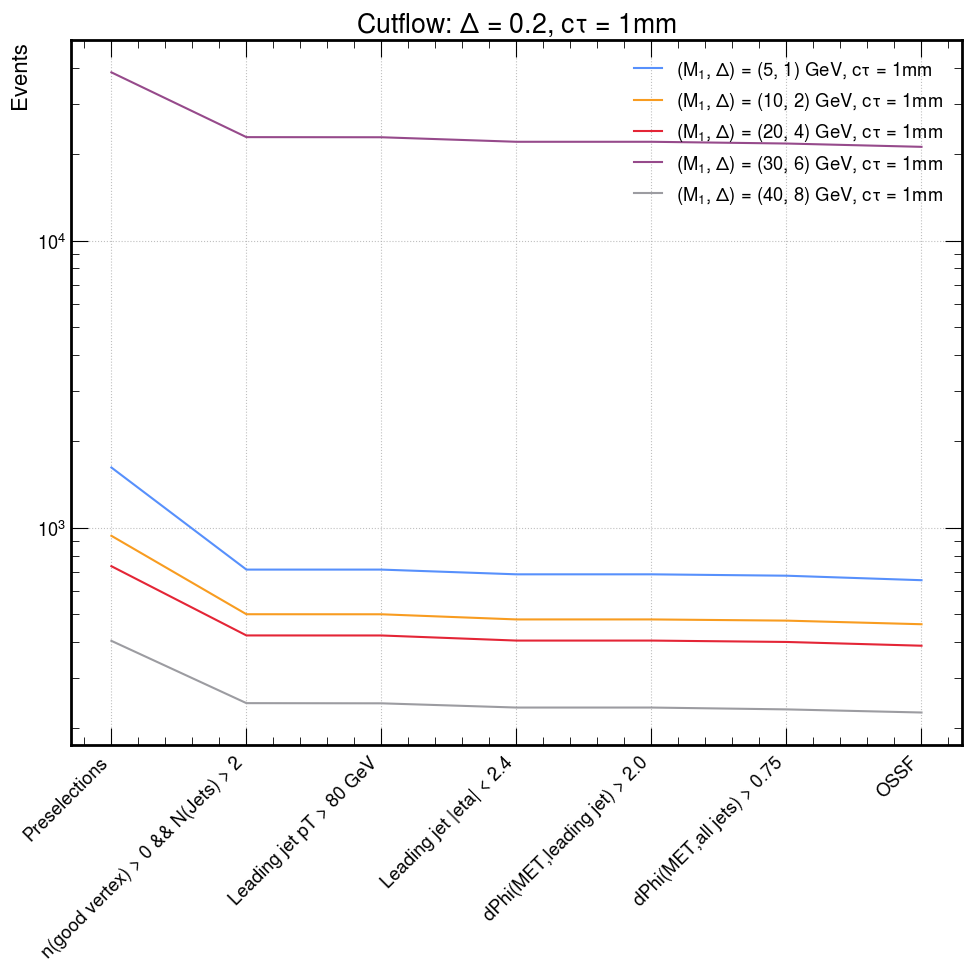

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


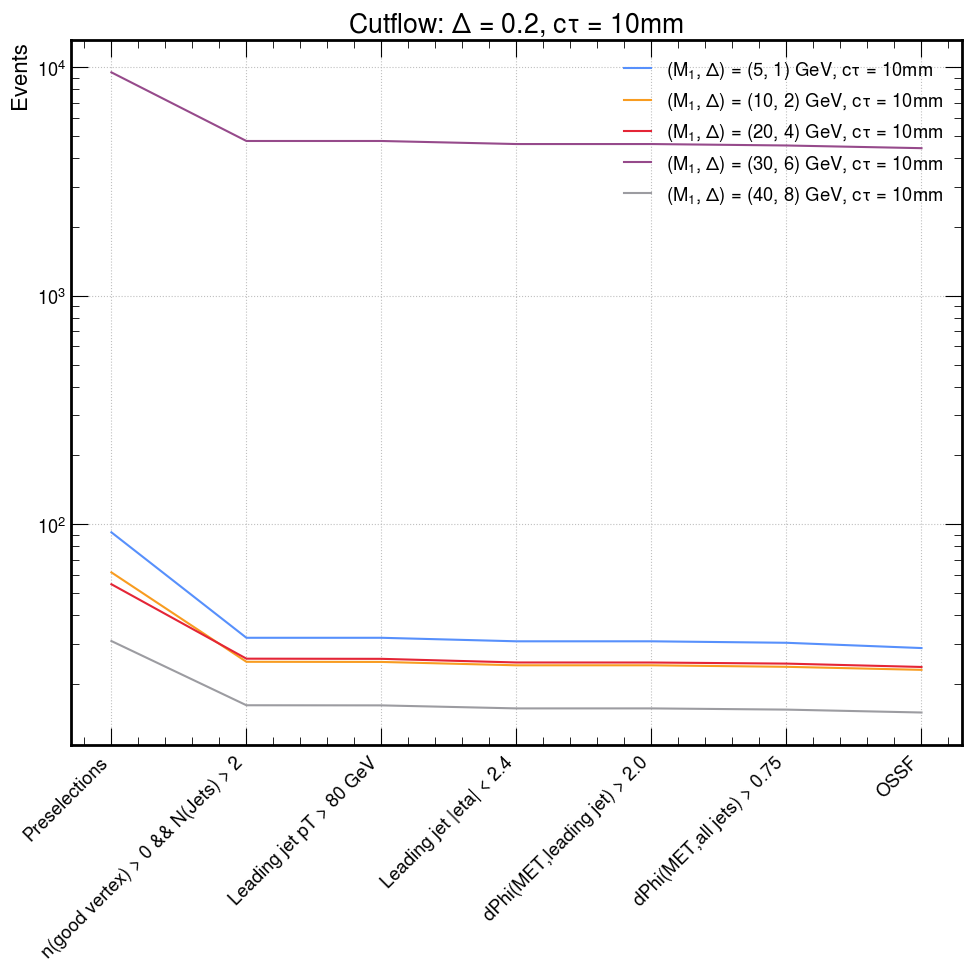

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


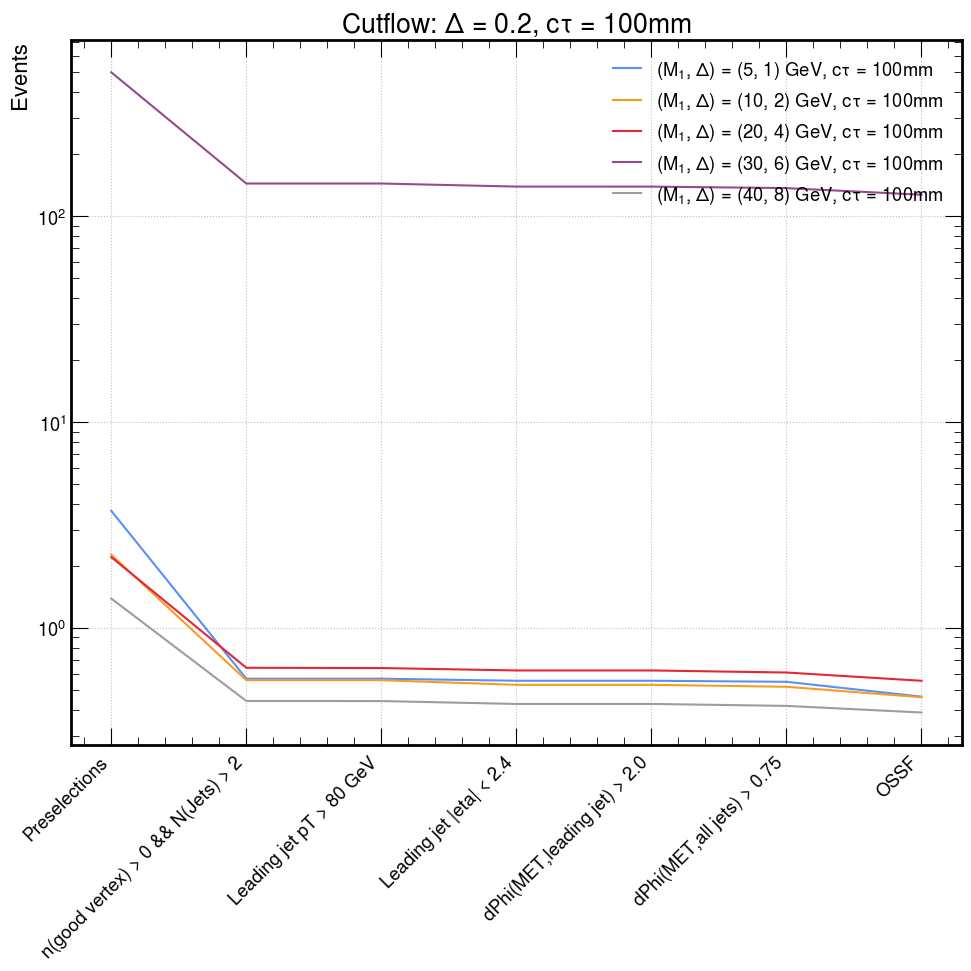

In [17]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


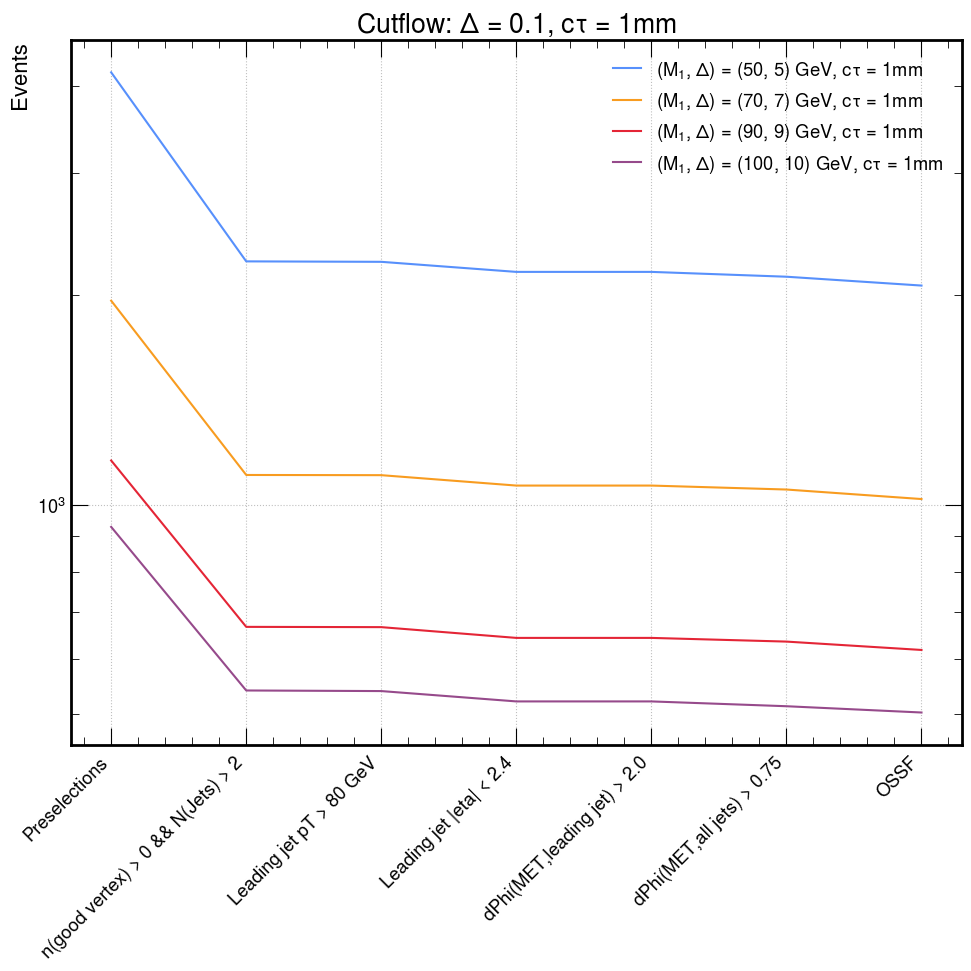

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


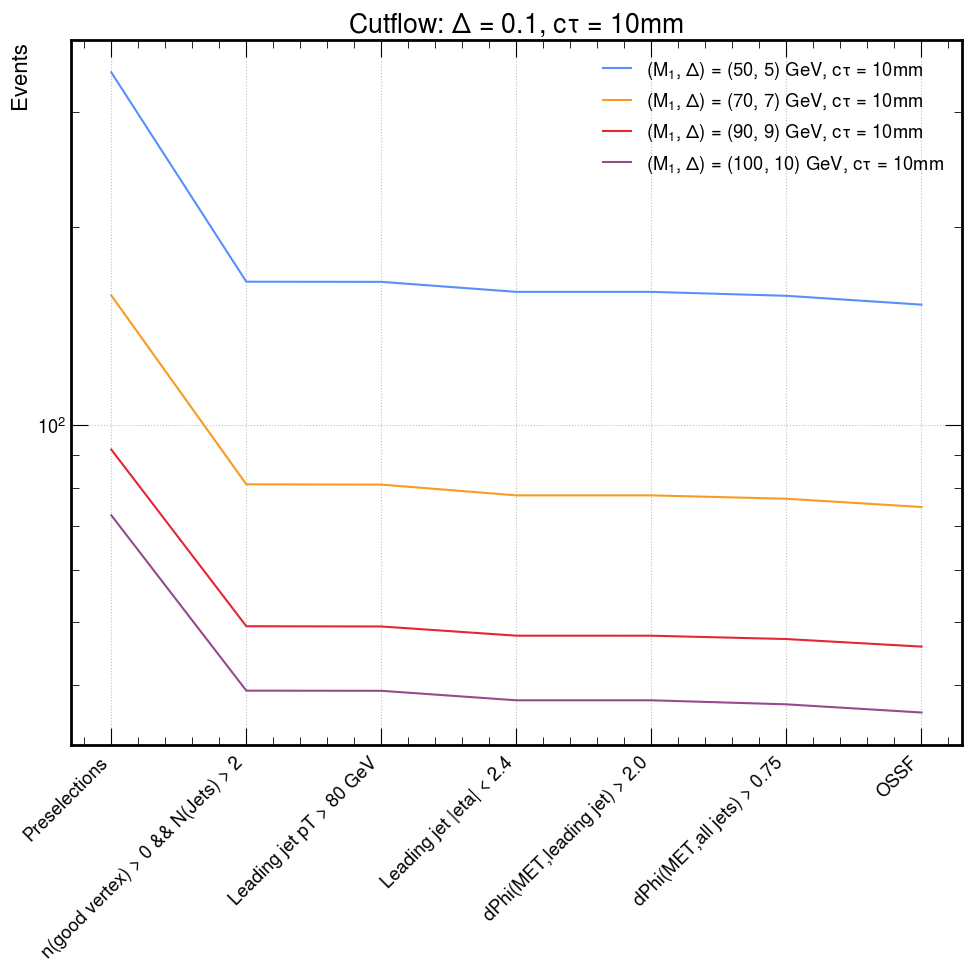

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


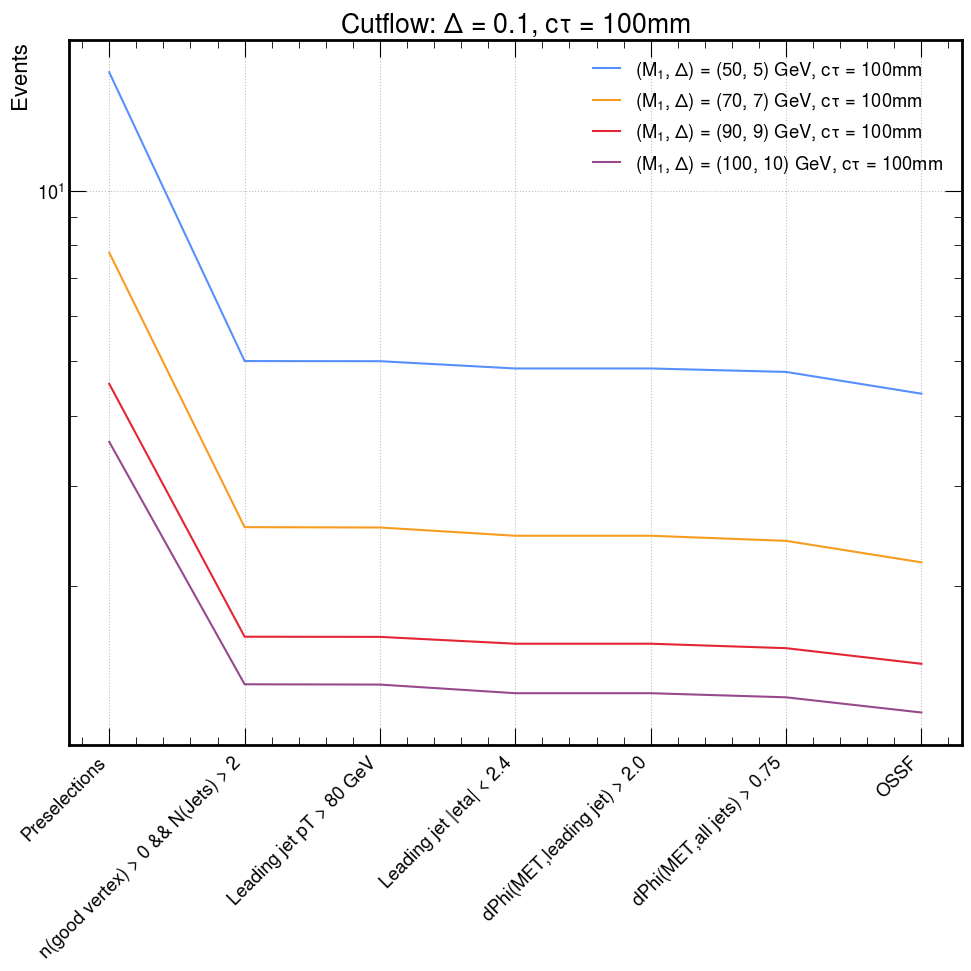

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


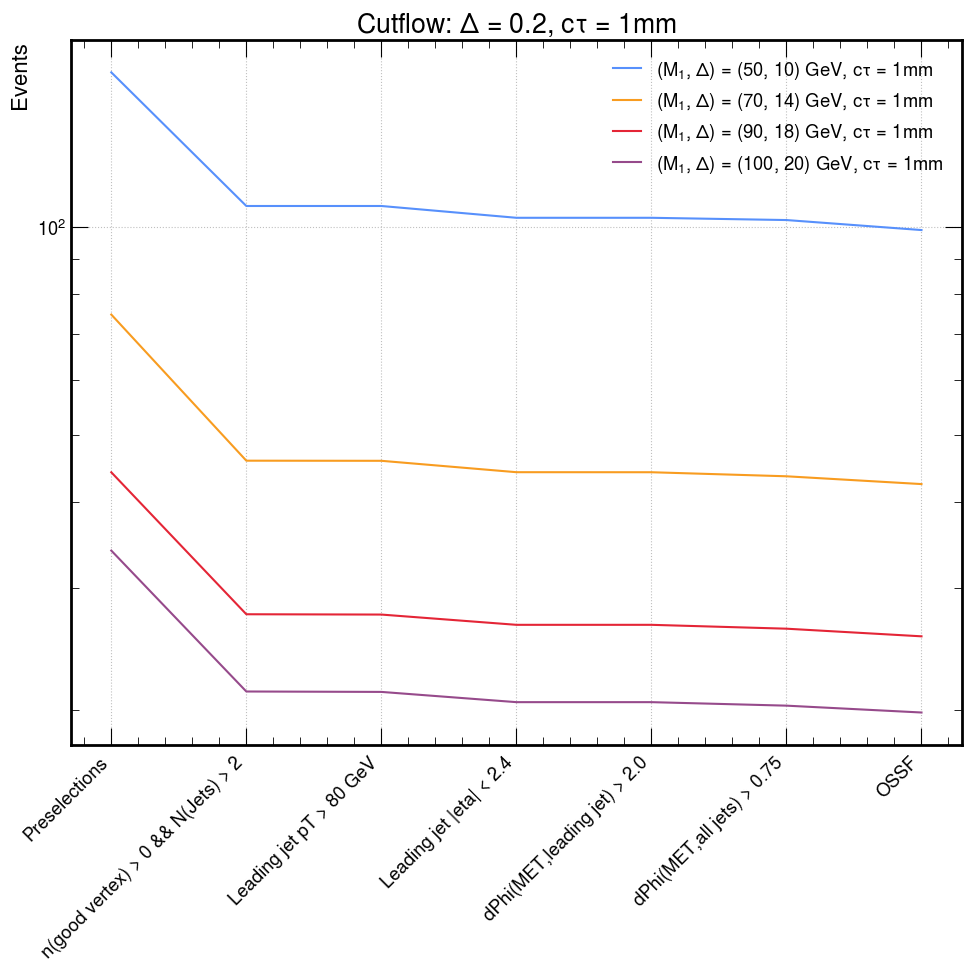

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


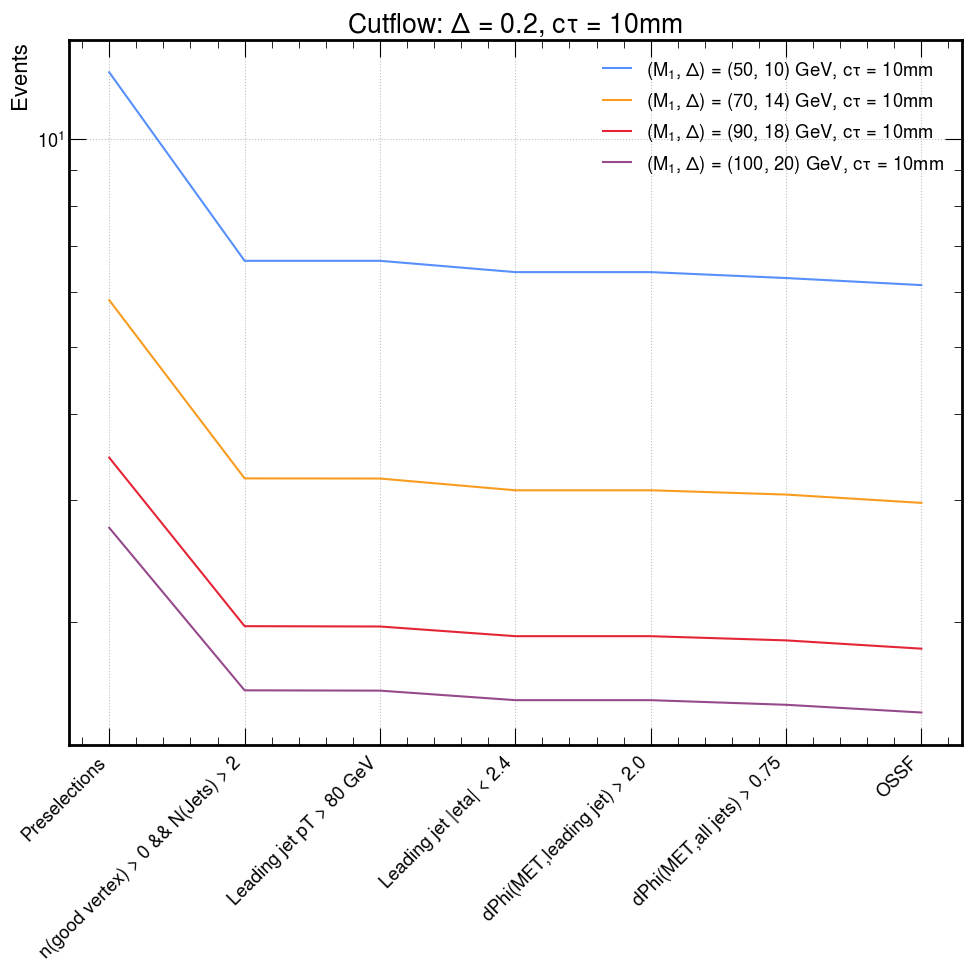

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


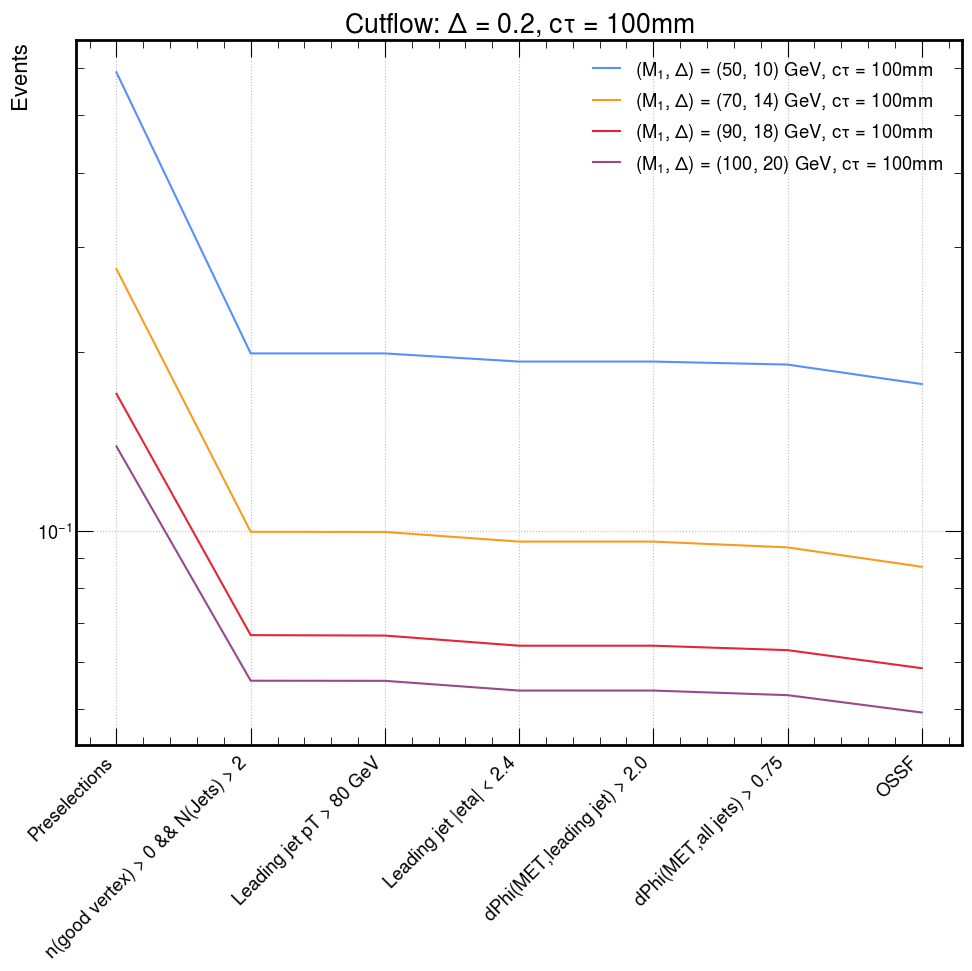

In [18]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Signal purity

In [13]:
purity_v11 = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')

In [14]:
purity_v11_reco = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_fromReco')

In [15]:
purity_v10 = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched')

In [16]:
purity_v10_reco = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched_fromReco')

In [132]:
ct = 10
delta = 0.2

In [133]:
table = purity_v11

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [134]:
table = purity_v10

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [ ]:
plt.plot(m_list, purity_v10_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')


plt.grid()
plt.ylim([0.5,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(All events after the cut)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

Text(0.5, 1.0, '$\\Delta$=0.2, 10mm')

In [ ]:
table = purity_v11_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [122]:
table = purity_v10_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

Text(0.5, 1.0, '$\\Delta$=0.1, 1mm')

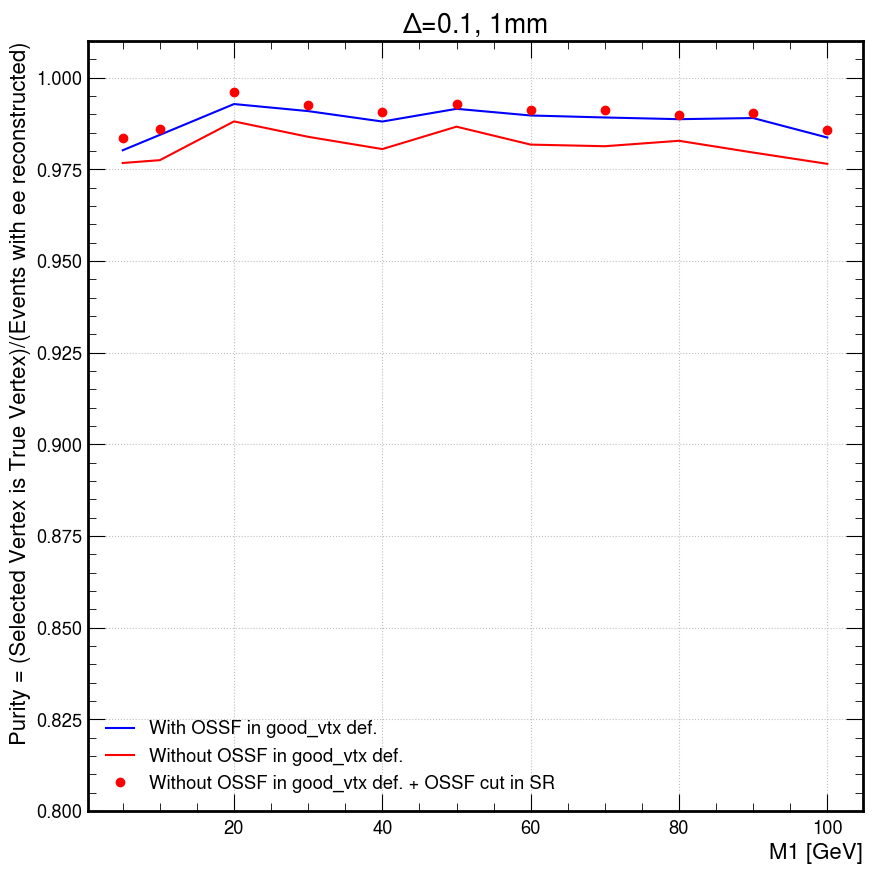

In [123]:
plt.plot(m_list, purity_v10_reco_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')

plt.grid()
plt.ylim([0.8,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(Events with ee reconstructed)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

## Background

In [23]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
Top,0.00039885,0.00001442,0.00001308,0.00001185,0.00001166,0.00001053,0.00000006
DY,0.00018701,0.00001257,0.00001244,0.00001206,0.00001180,0.00001058,0.00000027
WJets,0.00101318,0.00002788,0.00002733,0.00002605,0.00002587,0.00002387,0.00000017
ZGamma,0.00032468,0.00001403,0.00001148,0.00001047,0.00001008,0.00001018,0.00000016
ZJets,0.00242159,0.00004892,0.00004832,0.00004574,0.00004559,0.00004258,0.00000058
QCD,0.00000249,0.00000001,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000
Multiboson,0.00065832,0.00004711,0.00003851,0.00003619,0.00003441,0.00003271,0.00000008
Total,0.00001696,0.00000042,0.00000040,0.00000038,0.00000038,0.00000034,0.00000000


In [24]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v4_goodVtx_v9_Tight_bjetMed/Cutflow/Efficiency//Background_Efficiency.csv


In [25]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
Top,"26,174.93",946.25,858.46,777.73,765.41,690.89,3.87
DY,"5,819.49",391.25,387.08,375.32,367.32,329.19,8.34
WJets,"214,692.24","5,907.87","5,790.79","5,518.97","5,481.92","5,059.10",35.79
ZGamma,"1,665.13",71.94,58.88,53.71,51.68,52.19,0.83
ZJets,"63,745.58","1,287.65","1,272.02","1,204.00","1,200.19","1,120.99",15.30
QCD,"53,432.27",201.57,201.57,171.26,157.33,32.10,0.00
Multiboson,"4,588.16",328.35,268.41,252.24,239.79,228.01,0.58
Total,"370,117.80","9,134.89","8,837.21","8,353.24","8,263.65","7,512.47",64.72


In [26]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v4_goodVtx_v9_Tight_bjetMed/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [27]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
Top,703976,25285,22627,20476,19816,17814,77
DY,296131,9735,9697,9580,8728,5486,92
WJets,1177020,16358,16090,15538,15191,12955,85
ZGamma,6506,304,270,257,236,211,1
ZJets,738994,8102,8014,7689,7593,6487,75
QCD,31490,64,64,63,59,4,0
Multiboson,25187,1895,1496,1412,1291,1212,2
Total,2979304,61743,58258,55015,52914,44169,332


In [28]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
Top,703976,25285,22627,20476,19816,17814,77
DY,296131,9735,9697,9580,8728,5486,92
WJets,1177020,16358,16090,15538,15191,12955,85
ZGamma,6506,304,270,257,236,211,1
ZJets,738994,8102,8014,7689,7593,6487,75
QCD,31490,64,64,63,59,4,0
Multiboson,25187,1895,1496,1412,1291,1212,2
Total,2979304,61743,58258,55015,52914,44169,332


In [29]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v4_goodVtx_v9_Tight_bjetMed/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [30]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 64.72


In [31]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Top,DY,WJets,ZGamma,ZJets,QCD,Multiboson,Total
Weighted Counts,3.87,8.34,35.79,0.83,15.30,0.00,0.58,64.72
Raw Counts,77.00,92.00,85.00,1.00,75.00,0.00,2.00,332.00


Saved: ./plots/BDT_v4_goodVtx_v9_Tight_bjetMed/cutflow//Cutflow_background.png


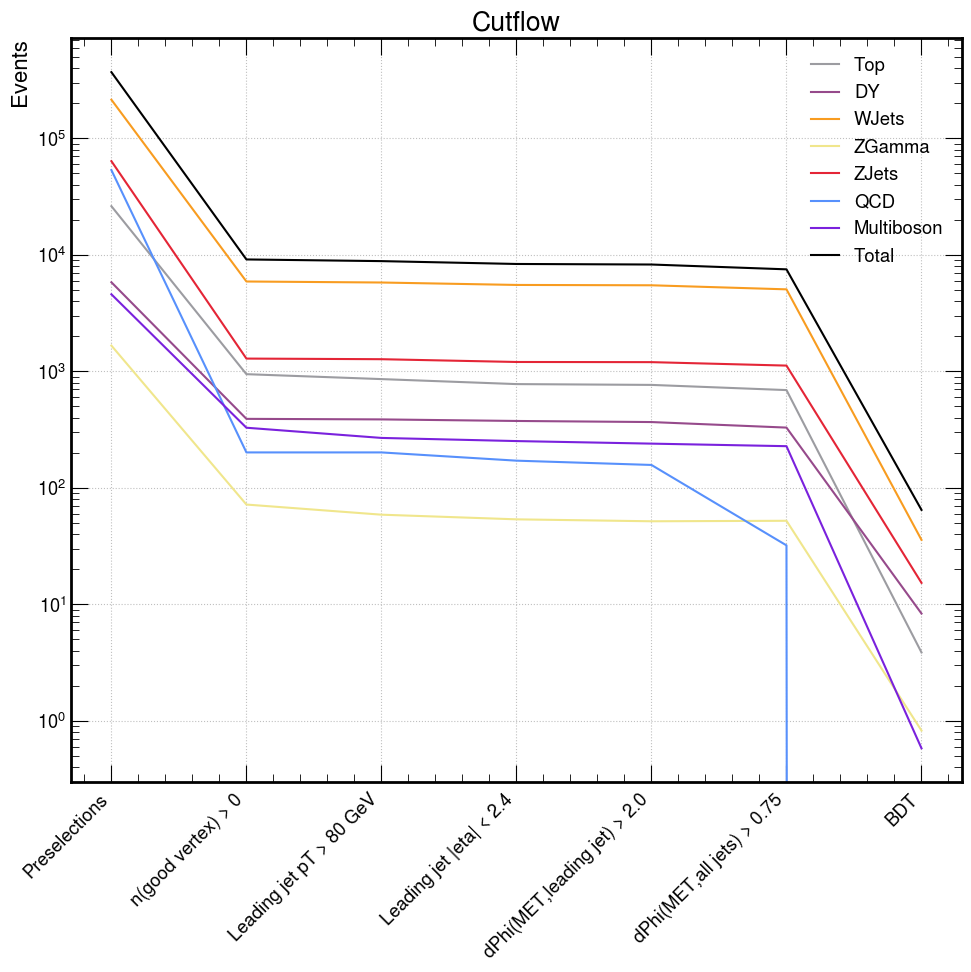

In [32]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

Saved: ./plots/BDT_v4_goodVtx_v9_Tight_bjetMed/cutflow//Cutflow_background.png


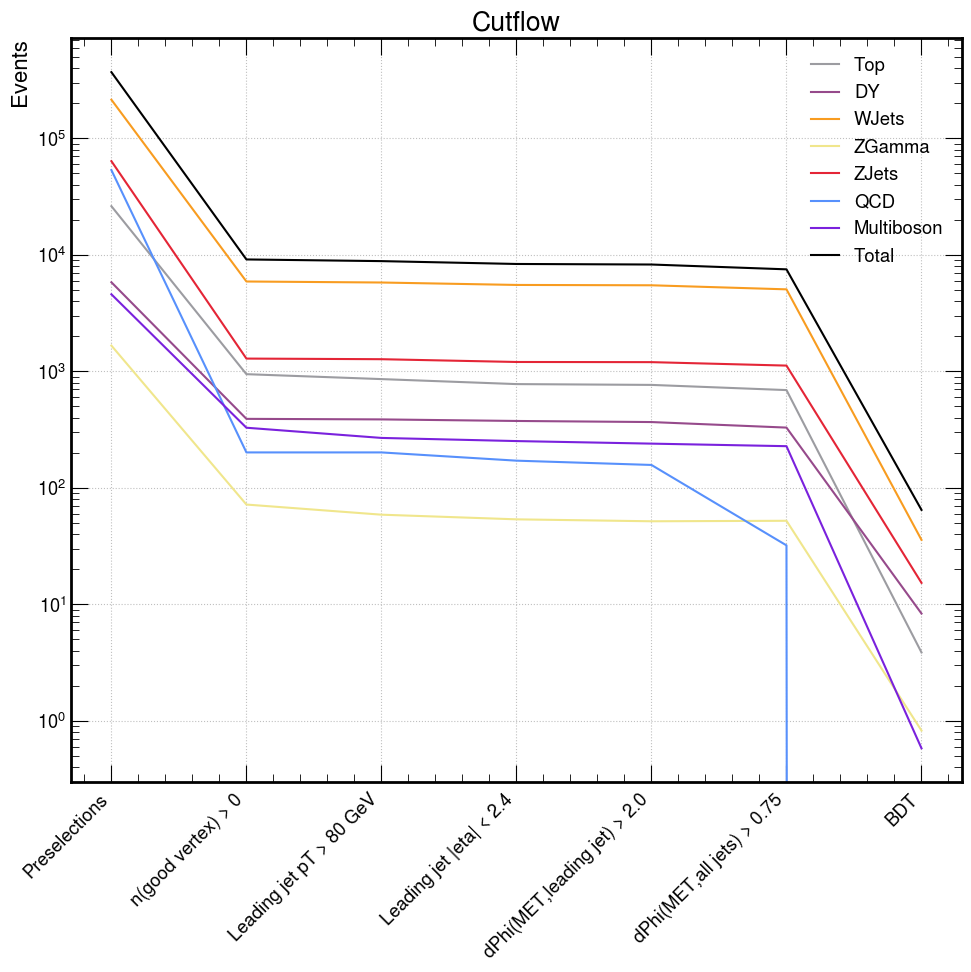

In [33]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/B

In [34]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

64.71540961434737

In [35]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [36]:
pd.options.display.float_format = '{:,.4f}'.format


In [37]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"6,789.1721",5.0000,0.1000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,525.0865,5.0000,0.2000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,4.8881,5.0000,0.1000,100.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,323.0046,5.0000,0.1000,10.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,0.3098,5.0000,0.2000,100.0000
...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,1.0592,100.0000,0.2000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,9.6205,100.0000,0.2000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,298.6269,100.0000,0.1000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.9772,100.0000,0.1000,100.0000


In [38]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [39]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"6,789.1721",64.7154,843.9427
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,525.0865,64.7154,65.2720
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,4.8881,64.7154,0.6076
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,323.0046,64.7154,40.1518
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0000,0.2000,100.0000,0.3098,64.7154,0.0385
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,9.6205,64.7154,1.1959
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,298.6269,64.7154,37.1215
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,0.9772,64.7154,0.1215
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,29.1293,64.7154,3.6210


In [40]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


In [41]:
ct = 1.0


In [42]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"6,789.1721",64.7154,843.9427
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"7,453.4825",64.7154,926.5212
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"7,168.5086",64.7154,891.0970
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"8,287.3447",64.7154,"1,030.1763"
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"4,183.4648",64.7154,520.0346
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,"1,691.1461",64.7154,210.2216
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,"1,041.9433",64.7154,129.5210
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,740.7572,64.7154,92.0814
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,522.6987,64.7154,64.9752
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,408.4072,64.7154,50.7679


In [43]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,525.0865,64.7154,65.2720
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,395.0636,64.7154,49.1092
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,349.3034,64.7154,43.4209
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"18,544.5121",64.7154,"2,305.2156"
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,191.0035,64.7154,23.7431
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,80.4046,64.7154,9.9949
62,60.0,0.2,1.0,0.0000,64.7154,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,27.4061,64.7154,3.4068
65,80.0,0.2,1.0,0.0000,64.7154,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,13.4236,64.7154,1.6686


In [44]:
ct = 10.0


In [45]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,323.0046,64.7154,40.1518
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,435.2300,64.7154,54.1022
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,525.7168,64.7154,65.3504
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"5,340.7329",64.7154,663.8913
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,339.6655,64.7154,42.2229
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,137.7523,64.7154,17.1236
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,88.3294,64.7154,10.9800
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,64.3958,64.7154,8.0049
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,48.3487,64.7154,6.0101
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,37.4312,64.7154,4.6530


In [46]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,22.5027,64.7154,2.7972
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,20.4477,64.7154,2.5418
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,21.7261,64.7154,2.7007
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"4,082.8840",64.7154,507.5317
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,13.4629,64.7154,1.6735
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,5.4003,64.7154,0.6713
63,60.0,0.2,10.0,0.0000,64.7154,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,2.4095,64.7154,0.2995
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.7742,64.7154,0.2205
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,1.3726,64.7154,0.1706


In [47]:
ct = 100.0


In [48]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,4.8881,64.7154,0.6076
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,7.6685,64.7154,0.9532
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,11.3679,64.7154,1.4131
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,715.3257",64.7154,213.2273
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,8.4316,64.7154,1.0481
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.8929,64.7154,0.4839
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.5766,64.7154,0.3203
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.8815,64.7154,0.2339
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.5122,64.7154,0.1880
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,1.2144,64.7154,0.1510


In [49]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.3098,64.7154,0.0385
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.3597,64.7154,0.0447
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.4865,64.7154,0.0605
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,118.1219,64.7154,14.6834
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.3470,64.7154,0.0431
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1525,64.7154,0.0190
64,60.0,0.2,100.0,0.0000,64.7154,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0731,64.7154,0.0091
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0611,64.7154,0.0076
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0456,64.7154,0.0057
